# STP598 Machine Learning \& Deep Learning
## Written Assignment 1
### Due 11:59pm Friday Sept. 15, 2023 on Canvas

### Daniel Kim,  1214869448

## Question 1

Let $C_1$, $C_2$, $C_3$ be independent events with probabilities $\frac12$, $\frac13$, $\frac14$, respectively. 

1. Compute $P(C_1\cup C_2 \cup C_3)$.

In [46]:
# The probability of each independent events
PC1 = 1/2; 
PC2 = 1/3;
PC3 = 1/4;

# P(C1 ∪ C2 ∪ C3) 
# = P(C1) + P(C2) + P(C3) - P(C1 ∩ C2) - P(C1 ∩ C3) - P(C1 ∩ C3) + P(C1 ∩ C2 ∩ C3)
# = P(C1) + P(C2) + P(C3) - P(C1|C2)*P(C2) - P(C1|C3)*P(C3) - P(C2|C3)*P(C3) + P(C1)*P(C2)*P(C3)
# = P(C1) + P(C2) + P(C3) - P(C1)*P(C2) - P(C1)*(C3) - P(C2)*P(C3) + P(C1)*P(C2)*P(C3)
P = PC1 + PC2 + PC3 - PC1*PC2 - PC1*PC3 - PC2*PC3 + PC1*PC2*PC3;
print("ANSWER: P = %4.3F" % P);


ANSWER: P = 0.750


2. Compute $P(C_1^c\cup C_2^c \cup C_3^c)$.

In [47]:
# From DeMorgan's Rule:
# P(!C1 U !C2 U !C3) = P(!(C1 ∩ C2 ∩ C3)) = 1 - P(C1 ∩ C2 ∩ C3)
P = 1 - PC1*PC2*PC3;
print("ANSWER: P = %4.3F" % P);

ANSWER: P = 0.958


## Question 2

In class we talked about Monty Hall problem (refer to page 34 of lecture 1). 

1. Now if there are 4 doors, you pick door 1 and Monty opens door 3 and door 4, will the conclusion change if you switch your choice to door 2? Compute the relative probabilities.

***
Let us define the following events:
- C is the event where the Car is behind the door we initially choose.
- !C is the event where the Car is **not** behind the door we initially choose.
- G is the event where Monty reveals two doors with goats (we assume that Monty will always reveal goats and not the car).

We need to determine which of the two probablities is greater: 
1. P(C|G) The probability of the car being behind the initial door given that a goat has been revealed.
2. P(!C|G) The probability of the car being behind one of the doors that we did not pick given that two goats have been revealed.


Using Baye's Rule:
P(C|G) = <font size="4"> $\frac{P(C)*(G|C)}{P(C)*P(G|C)+P(!C)*P(G|!C)}$ </font>

- P(C) = 1/4, the probability of the car being behind one of the four doors
- P(!C) = 3/4, the probability of the car being behind the other three doors
- P(G|C) = 1, Monty will always reveal goats
- P(G|!C) = 1, Monty will always reveal goats regardless of where the car is

 P(C|G) = <font size="4">$\frac{\frac14*1}{\frac14*1+\frac34*1}$ </font>
 
$\textbf{P(C|G) =} \mathbf{\frac14}$


Conversely, P(!C|G) =<font size ="4"> $\frac{P(!C)*(G|!C)}{P(!C)*P(G|!C)+P(C)*P(G|C)}$ </font>  
P(!C|G) = <font size="4"> $\frac{\frac34*1}{\frac34*1+\frac14*1}$ </font>

$\textbf{P(!C|G) =} \mathbf{\frac34}$


**Switching doors improves your odds of winning from 1/4 to 3/4. Thus, it is better to switch.**

***

2. Again there are 4 doors, you pick door 1 and Monty only opens 4. Should you change your choice? Write down your analysis.

***

Employing the same logic as in part 1 of this question, we know that the probability of the car being among the doors that you did **not** initially pick, P(!C), = 0.75. In fact, P(!C) = n-1/n where n is the number of doors. However, you have to consider P(F), the probability of finding the car among the doors you did not initially choose. Since you are choosing from the remaining two doors, P(F) = 1/2. Thus, your probability of winning when switching is $P(!C)*P(F) = \frac34 * \frac12 = \frac38 = 0.375.$ 

**Switching increases your probability of winning from 0.25 to 0.375, thus you should switch in this scenario as well.**

## Question 3

In the linear regression

\begin{equation}
Y = X \beta + \epsilon, \quad \epsilon \overset{iid}{\sim} (0, \sigma^2)
\end{equation}

Given data $\{y_i, {\bf x}_i\}_{i=1}^n$, assume $n>p$ with $p$ being the number of features. We can have the following estimator for $\sigma^2$ (Refer to page 13 of lecture 2 for relevant symbols):

\begin{equation}
\hat\sigma^2 = \frac{\sum_{i=1}^n (y_i-\hat y_i)^2}{n-(p+1)} = \frac{\Vert {\bf y}-\hat {\bf y}\Vert^2}{n-(p+1)} = \frac{{\bf y}^T ({\bf I}-{\bf H}) {\bf y}}{n-(p+1)}
\end{equation}

1. We know $\mathbb E[{\bf v}^T\Lambda {\bf v}] = \mu^T \Lambda \mu + \mathrm{tr}[\Lambda \Sigma]$ for $\mathbb E [{\bf v}]=\mu$ and $\mathrm{Cov}[{\bf v}] = \Sigma$. Can you prove that $\hat\sigma^2$ is an unbiased estimator of $\sigma^2$, i.e. $\mathbb E[\hat\sigma^2] = \sigma^2$?

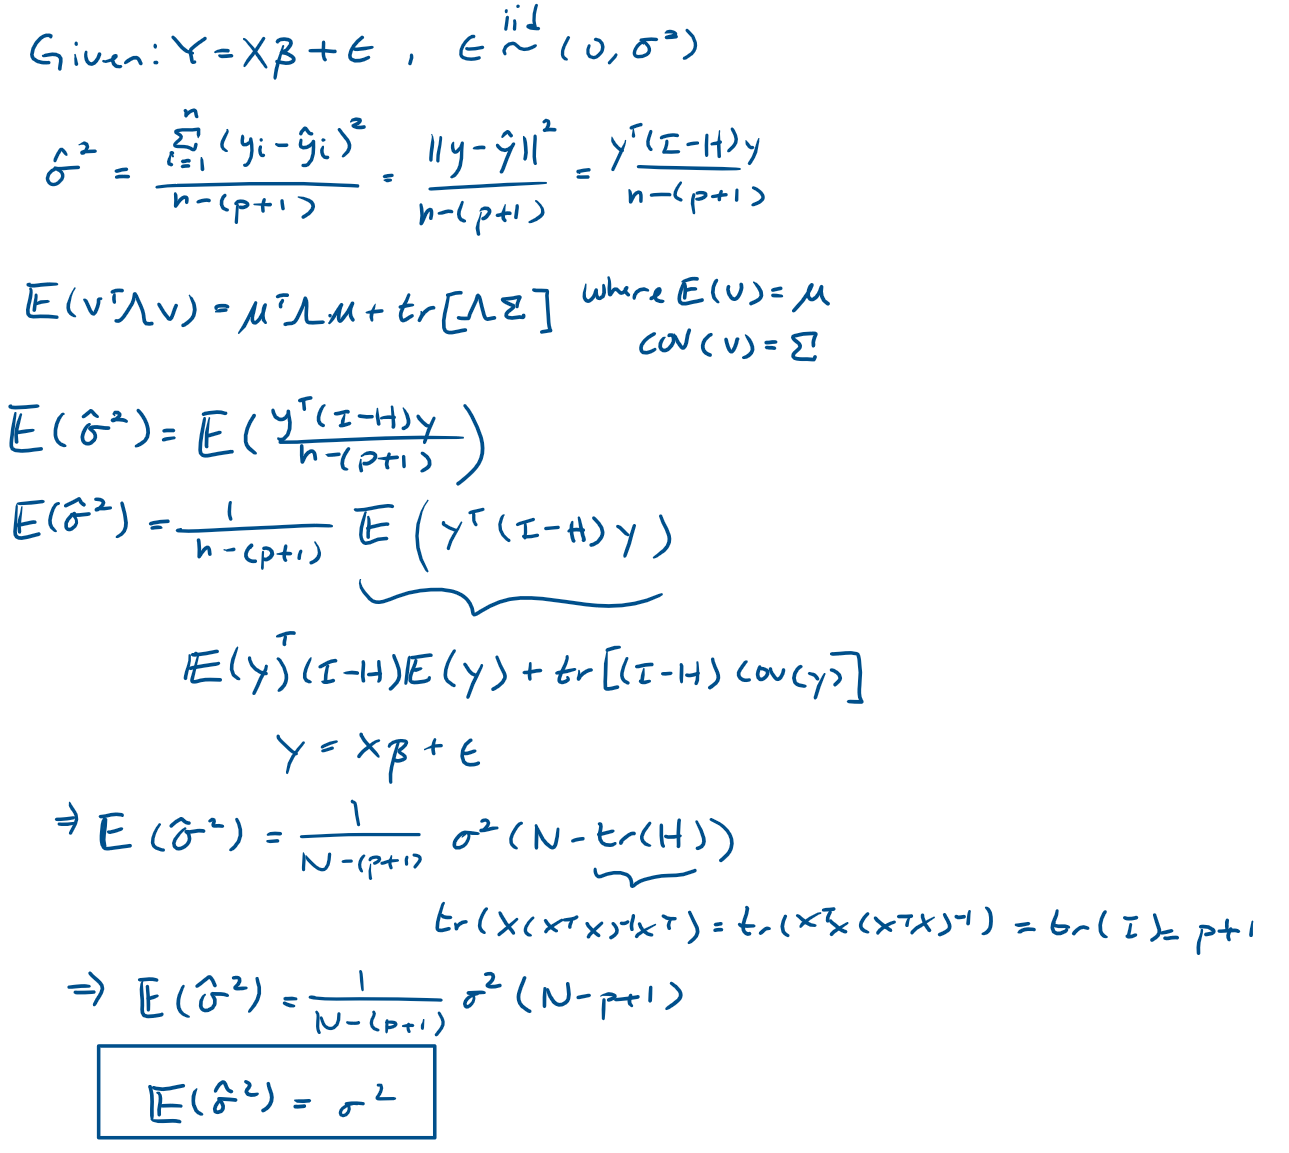

2. (bonus) Can you further show that $\hat\sigma^2 / \sigma^2 \sim \chi^2(n-(p+1))$? What condition do you need?

## Question 4

Consider diabetes data in scikit-learn package. Load it as follows.

In [126]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets
import pandas as pd

# Load the diabetes dataset
diabetes_X, diabetes_y = datasets.load_diabetes(return_X_y=True, as_frame=True)

# print the first 5 records
diabetes = pd.concat([diabetes_y, diabetes_X], axis=1)  # axis 1 to concat data columns horizontally
diabetes.head(5) 


,target,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,151.0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,75.0,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,141.0,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,206.0,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,135.0,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641


1. Fit linear regression, ridge regression and lasso respectively. The penalty parameters can be determined using cross-validation (`sklearn.linear_model.RidgeCV`, `sklearn.linear_model.LassoCV`). Plot three regression lines $y\sim bmi$ on the same graph.

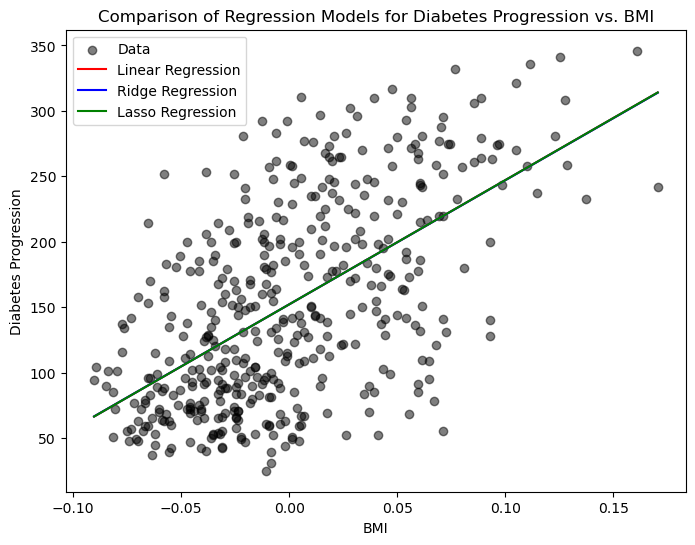

In [127]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV

# Load a diabetes dataset
diabetes_data = datasets.load_diabetes()

# Extract the 'body_mass_index' feature and reshape it
bmi_feature = diabetes_data.data[:, np.newaxis, 2]

# Use diabetes target values as the target variable
target_variable = diabetes_data.target

# training data
X_train, y_train = bmi, diabetes_y

# regression models
linear_regression_model = LinearRegression()
ridge_regression_model = RidgeCV(alphas=np.logspace(-6, 6, 5))
lasso_regression_model = LassoCV(alphas=np.logspace(-6, 6, 5))

# fitting model
linear_regression_model.fit(bmi_feature, target_variable)
ridge_regression_model.fit(bmi_feature, target_variable)
lasso_regression_model.fit(bmi_feature, target_variable)

# range of BMI values for plotting the lines
bmi_range = np.linspace(np.min(bmi_feature), np.max(bmi_feature), 100).reshape(-1, 1)

# predicted regression lines
predicted_linear = linear_regression_model.predict(bmi_range)
predicted_ridge = ridge_regression_model.predict(bmi_range)
predicted_lasso = lasso_regression_model.predict(bmi_range)

# plotting regression lines and data points
plt.figure(figsize=(8, 6))
plt.scatter(bmi_feature, target_variable, color='black', label='Data', alpha=0.5)  # Scatter plot of the data points
plt.plot(bmi_range, predicted_linear, label='Linear Regression', color='red')
plt.plot(bmi_range, predicted_ridge, label='Ridge Regression', color='blue')
plt.plot(bmi_range, predicted_lasso, label='Lasso Regression', color='green')

# axis labels, legend, and title
plt.xlabel('BMI')
plt.ylabel('Diabetes Progression')
plt.legend()
plt.title('Comparison of Regression Models for Diabetes Progression vs. BMI')

# plot
plt.show()


2. Plot lasso coefficients as a function of the regularization. Refer to `plot_ridge_path.ipynb`.

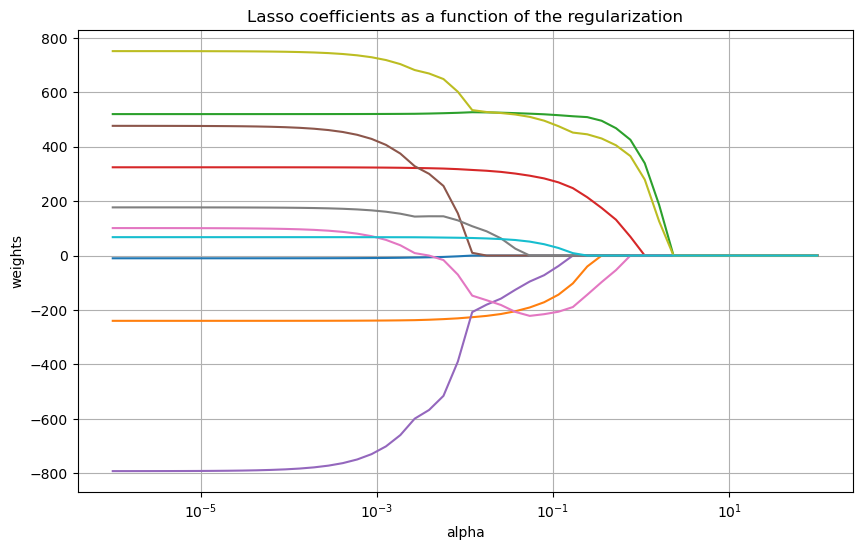

In [128]:
alphas = np.logspace(-6, 2, 50)
coefficients = []  # empty list to store coefficients

for alpha in alphas:
    lasso = Lasso(alpha=alpha)
    lasso.fit(diabetes_X, diabetes_y)
    coefficients.append(lasso.coef_)  # append coefficients to the list

# convert to numpy array
coefficients = np.array(coefficients)

# plotting
plt.figure(figsize=(10, 6))
plt.plot(alphas, coefficients)
plt.xscale('log')
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Lasso coefficients as a function of the regularization')
plt.grid(True)
plt.show()
